In [33]:
import pandas as pd

students = pd.read_csv("students.csv")
teachers = pd.read_csv("teachers.csv")
grades1 = pd.read_csv("grades1.csv")
grades2 = pd.read_csv("grades2.csv")
contacts = pd.read_csv("contact.csv")

students.head(2)

,id,firstname,lastname
0,34292,Joshua,Davis
1,34293,Karen,Flores


In [4]:
teachers.head(2)

,course,teacher
0,PHYS101,Wayne Walker
1,CHEM101,Albert Taylor


In [5]:
grades1.head(2)

,student_id,course,grade
0,34292,ENGL101,A
1,34293,ENGL101,A


In [6]:
grades2.head(2)

,student_id,course,grade
0,34302,DRAM101,F
1,34303,DRAM101,D


In [7]:
contacts.head(2)

,student_id,parent_contact,phone
0,34292,Samuel Davis,(356) 849-0352
1,34293,Laura Flores,(477) 325-7117


## Concat and Append

In [13]:
'''
add a semester column to each of the grades 1 and 2
and then concatenate them
'''
grades1["Semester"] = 1
grades2["Semester"] = 2
grades = pd.concat([grades1,grades2])
grades

,student_id,course,grade,Semester
0,34292,ENGL101,A,1
1,34293,ENGL101,A,1
2,34294,ENGL101,C,1
3,34295,ENGL101,C,1
4,34296,ENGL101,C,1
...,...,...,...,...
60,34312,DESN101,E,2
61,34313,DESN101,D,2
62,34314,DESN101,A,2
63,34315,DESN101,A,2


In [9]:
'''
can also use append function since they have the same colums
'''
appended = grades1.copy().append(grades2)
appended

,student_id,course,grade,Semester
0,34292,ENGL101,A,1
1,34293,ENGL101,A,1
2,34294,ENGL101,C,1
3,34295,ENGL101,C,1
4,34296,ENGL101,C,1
...,...,...,...,...
60,34312,DESN101,E,2
61,34313,DESN101,D,2
62,34314,DESN101,A,2
63,34315,DESN101,A,2


In [14]:
'''
merged ds has repeating indices so need to reset the index column
the drop parameter will ensure the old index column is dropped
'''
grades = grades.reset_index(drop=True)
grades

,student_id,course,grade,Semester
0,34292,ENGL101,A,1
1,34293,ENGL101,A,1
2,34294,ENGL101,C,1
3,34295,ENGL101,C,1
4,34296,ENGL101,C,1
...,...,...,...,...
185,34312,DESN101,E,2
186,34313,DESN101,D,2
187,34314,DESN101,A,2
188,34315,DESN101,A,2


## Merging Horizonally

In [24]:
'''
left_on/right_on identify the primary and foreign key columns
if the names of the columns are the same then just use the "on" param
'''
student_grades = pd.merge(students, grades, left_on="id", right_on="student_id")
student_grades

,id,firstname,lastname,student_id,course,grade,Semester
0,34292,Joshua,Davis,34292,ENGL101,A,1
1,34292,Joshua,Davis,34292,MATH101,A,1
2,34292,Joshua,Davis,34292,PHYS101,D,1
3,34292,Joshua,Davis,34292,MATH102,F,1
4,34292,Joshua,Davis,34292,COMP101,A,1
...,...,...,...,...,...,...,...
185,34316,Stephen,Martinez,34316,ARTT101,A,1
186,34316,Stephen,Martinez,34316,DESN101,A,1
187,34316,Stephen,Martinez,34316,DRAM101,F,2
188,34316,Stephen,Martinez,34316,ARTT101,A,2


In [17]:
'''
verify the shapes of the source and merged df's to make sure no data
was lost
'''
print(students.shape, grades.shape, student_grades.shape)

(25, 3) (190, 4) (190, 7)


In [21]:
'''
merge the students and contacts tables
rename the id column in the contacts table first
'''
students2 = students.rename({"id": "student_id"}, axis=1)
students_full = students2.merge(contacts, on="student_id")
students_full

,student_id,firstname,lastname,parent_contact,phone
0,34292,Joshua,Davis,Samuel Davis,(356) 849-0352
1,34293,Karen,Flores,Laura Flores,(477) 325-7117
2,34294,Julia,Walker,Eric Walker,(871) 639-0797
3,34295,Cynthia,Robinson,Chris Robinson,(574) 683-2107
4,34296,Bonnie,Hall,Dorothy Hall,(384) 293-2113
5,34297,Gary Lee,Lee,Mary Lee,(914) 452-6366
6,34298,Ruby,Thompson,Jose Thompson,(253) 419-7702
7,34299,Heather,Miller,Annie Miller,(864) 583-9615
8,34300,Mary,Mitchell,Edward Mitchell,(494) 471-1604
9,34301,Carlos,Ross,Debra Ross,(592) 663-4425


In [25]:
students_grades_full = students_full.merge(student_grades, on="student_id")
students_grades_full

print(students_grades_full.shape, student_grades.shape, students_full.shape)

(190, 11) (190, 7) (25, 5)


In [26]:
students_grades_full

,student_id,firstname_x,lastname_x,parent_contact,phone,id,firstname_y,lastname_y,course,grade,Semester
0,34292,Joshua,Davis,Samuel Davis,(356) 849-0352,34292,Joshua,Davis,ENGL101,A,1
1,34292,Joshua,Davis,Samuel Davis,(356) 849-0352,34292,Joshua,Davis,MATH101,A,1
2,34292,Joshua,Davis,Samuel Davis,(356) 849-0352,34292,Joshua,Davis,PHYS101,D,1
3,34292,Joshua,Davis,Samuel Davis,(356) 849-0352,34292,Joshua,Davis,MATH102,F,1
4,34292,Joshua,Davis,Samuel Davis,(356) 849-0352,34292,Joshua,Davis,COMP101,A,1
...,...,...,...,...,...,...,...,...,...,...,...
185,34316,Stephen,Martinez,Norma Martinez,(783) 439-7854,34316,Stephen,Martinez,ARTT101,A,1
186,34316,Stephen,Martinez,Norma Martinez,(783) 439-7854,34316,Stephen,Martinez,DESN101,A,1
187,34316,Stephen,Martinez,Norma Martinez,(783) 439-7854,34316,Stephen,Martinez,DRAM101,F,2
188,34316,Stephen,Martinez,Norma Martinez,(783) 439-7854,34316,Stephen,Martinez,ARTT101,A,2


In [27]:
full = students_grades_full.merge(teachers, on="course")

In [44]:
full.head()


,student_id,firstname_x,lastname_x,parent_contact,phone,id,firstname_y,lastname_y,course,grade,Semester,teacher
0,34292,Joshua,Davis,Samuel Davis,(356) 849-0352,34292,Joshua,Davis,ENGL101,A,1,Ernest Green
1,34293,Karen,Flores,Laura Flores,(477) 325-7117,34293,Karen,Flores,ENGL101,A,1,Ernest Green
2,34294,Julia,Walker,Eric Walker,(871) 639-0797,34294,Julia,Walker,ENGL101,C,1,Ernest Green
3,34295,Cynthia,Robinson,Chris Robinson,(574) 683-2107,34295,Cynthia,Robinson,ENGL101,C,1,Ernest Green
4,34296,Bonnie,Hall,Dorothy Hall,(384) 293-2113,34296,Bonnie,Hall,ENGL101,C,1,Ernest Green


In [58]:
'''
get counts of student "F"'s' using two methods
'''
df2 = full.loc[full.grade == "F", ["student_id"]]

method1 = df2["student_id"].value_counts().rename_axis("student_id").reset_index(name="counts")
method1

,student_id,counts
0,34300,4
1,34302,3
2,34303,2
3,34309,2
4,34311,2
5,34313,2
6,34316,2
7,34292,2
8,34294,2
9,34299,2


In [69]:
'''
second method with groupby
'''
method2 = full.loc[full.grade == "F", ["student_id", "grade"]].groupby("student_id").count().reset_index()
method2.columns = ["student_id", "counts"]
method2.head(50)

,student_id,counts
0,34292,2
1,34293,1
2,34294,2
3,34297,1
4,34298,1
5,34299,2
6,34300,4
7,34301,2
8,34302,3
9,34303,2


In [75]:
'''
extract the studentid for rows with count >= 3
for use as a mask
'''
sids = method1[method1.counts >= 3].student_id
sids.head()

0    34300
1    34302
Name: student_id, dtype: int64

In [77]:
'''
finally filter the students ds using the mask
'''

final = students_full[students_full.student_id.isin(sids)]
final

,student_id,firstname,lastname,parent_contact,phone
8,34300,Mary,Mitchell,Edward Mitchell,(494) 471-1604
10,34302,Dorothy,Green,Russell Green,(749) 344-5744


### Join

In [119]:
'''
joins operate on the index and can be chained
'''
students2 = students.set_index("id")
contacts2 = contacts.set_index("student_id")

students2.join(contacts2)

,id,firstname,lastname
0,34292,Joshua,Davis
1,34293,Karen,Flores
2,34294,Julia,Walker
3,34295,Cynthia,Robinson
4,34296,Bonnie,Hall


,student_id,parent_contact,phone
0,34292,Samuel Davis,(356) 849-0352
1,34293,Laura Flores,(477) 325-7117
2,34294,Eric Walker,(871) 639-0797
3,34295,Chris Robinson,(574) 683-2107
4,34296,Dorothy Hall,(384) 293-2113


,firstname,lastname,parent_contact,phone
id,,,,
34292,Joshua,Davis,Samuel Davis,(356) 849-0352
34293,Karen,Flores,Laura Flores,(477) 325-7117
34294,Julia,Walker,Eric Walker,(871) 639-0797
34295,Cynthia,Robinson,Chris Robinson,(574) 683-2107
34296,Bonnie,Hall,Dorothy Hall,(384) 293-2113
34297,Gary Lee,Lee,Mary Lee,(914) 452-6366
34298,Ruby,Thompson,Jose Thompson,(253) 419-7702
34299,Heather,Miller,Annie Miller,(864) 583-9615
34300,Mary,Mitchell,Edward Mitchell,(494) 471-1604


### Merge Types

In [122]:
df_s = pd.read_csv("students.csv")
df_p = pd.read_csv("contact.csv")
df_g = pd.read_csv("grades1.csv")
df_desn = df_g[df_g.course == "DESN101"]

In [124]:
'''
inner join
'''
pd.merge(df_s, df_desn, left_on="id", right_on="student_id", how="inner")

,id,firstname,lastname,student_id,course,grade
0,34295,Cynthia,Robinson,34295,DESN101,C
1,34296,Bonnie,Hall,34296,DESN101,C
2,34297,Gary Lee,Lee,34297,DESN101,A
3,34308,Shawn,Rivera,34308,DESN101,E
4,34309,Lois,James,34309,DESN101,B
5,34310,William,Sanders,34310,DESN101,C
6,34311,Barbara,Peterson,34311,DESN101,D
7,34312,Douglas,Cook,34312,DESN101,E
8,34313,Helen,Allen,34313,DESN101,D
9,34314,Melissa,Price,34314,DESN101,A


In [125]:
'''
left join

Keep all rows on the left. Non corresponding rows will get filled with
NaN's
'''
pd.merge(df_s, df_desn, left_on="id", right_on="student_id", how="left")

,id,firstname,lastname,student_id,course,grade
0,34292,Joshua,Davis,NaN,NaN,NaN
1,34293,Karen,Flores,NaN,NaN,NaN
2,34294,Julia,Walker,NaN,NaN,NaN
3,34295,Cynthia,Robinson,34295.0,DESN101,C
4,34296,Bonnie,Hall,34296.0,DESN101,C
5,34297,Gary Lee,Lee,34297.0,DESN101,A
6,34298,Ruby,Thompson,NaN,NaN,NaN
7,34299,Heather,Miller,NaN,NaN,NaN
8,34300,Mary,Mitchell,NaN,NaN,NaN
9,34301,Carlos,Ross,NaN,NaN,NaN


In [126]:
'''
right join

Keep all rows on the right (in this case results are same as inner)
'''
pd.merge(df_s, df_desn, left_on="id", right_on="student_id", how="right")

,id,firstname,lastname,student_id,course,grade
0,34295,Cynthia,Robinson,34295,DESN101,C
1,34296,Bonnie,Hall,34296,DESN101,C
2,34297,Gary Lee,Lee,34297,DESN101,A
3,34308,Shawn,Rivera,34308,DESN101,E
4,34309,Lois,James,34309,DESN101,B
5,34310,William,Sanders,34310,DESN101,C
6,34311,Barbara,Peterson,34311,DESN101,D
7,34312,Douglas,Cook,34312,DESN101,E
8,34313,Helen,Allen,34313,DESN101,D
9,34314,Melissa,Price,34314,DESN101,A


### Everything after here  is new


In [3]:
'''
outer join demo
'''
df_a = pd.DataFrame({"A": ["x", "y", "z"], "B": [1,2,3]})
df_b = pd.DataFrame({"A": ["u", "v", "x"], "B": [5.0,4.0,3.0]})

display(df_a, df_b)

,A,B
0,x,1
1,y,2
2,z,3


,A,B
0,u,5.0
1,v,4.0
2,x,3.0


In [5]:
'''
the outer join will include all rows (the row that's inner joined on the
value 'x' in the A column)
'''

pd.merge(df_a, df_b, on="A", how="outer")

,A,B_x,B_y
0,x,1.0,3.0
1,y,2.0,NaN
2,z,3.0,NaN
3,u,NaN,5.0
4,v,NaN,4.0


### Duplicate Keys

In [28]:
'''
when duplicate keys are present, pandas
will calculate the cross-product (n by m merge)
'''

df_a = pd.DataFrame({"A": ["x", "x", "z"], "B": [1,2,3]})
df_b = pd.DataFrame({"A": ["u", "x", "x"], "C": [5.0,4.0,3.0]})

pd.merge(df_a, df_b, on="A")

,A,B,C
0,x,1,4.0
1,x,1,3.0
2,x,2,4.0
3,x,2,3.0


### Duplicate Rows

In [17]:
df_a = pd.DataFrame({"A": ["x", "y", "z"], "B": [1,2,3]})
df_b = pd.DataFrame({"A": ["u", "v", "x"], "B": [5.0,4.0,3.0]})

'''
use suffix arg to change the col names
'''
pd.merge(df_a, df_b, on="A", suffixes=("_left", "_right"))

,A,B_left,B_right
0,x,1,3.0


### Validating Expected outputs

In [23]:
pd.merge(students, contacts, left_on="id", right_on="student_id", 
         validate="one_to_one")

,id,firstname,lastname,student_id,parent_contact,phone
0,34292,Joshua,Davis,34292,Samuel Davis,(356) 849-0352
1,34293,Karen,Flores,34293,Laura Flores,(477) 325-7117
2,34294,Julia,Walker,34294,Eric Walker,(871) 639-0797
3,34295,Cynthia,Robinson,34295,Chris Robinson,(574) 683-2107
4,34296,Bonnie,Hall,34296,Dorothy Hall,(384) 293-2113
5,34297,Gary Lee,Lee,34297,Mary Lee,(914) 452-6366
6,34298,Ruby,Thompson,34298,Jose Thompson,(253) 419-7702
7,34299,Heather,Miller,34299,Annie Miller,(864) 583-9615
8,34300,Mary,Mitchell,34300,Edward Mitchell,(494) 471-1604
9,34301,Carlos,Ross,34301,Debra Ross,(592) 663-4425


### Composite Keys

In [129]:




df_1 = pd.DataFrame({"year": [2000, 2000, 2001,2001], 
                     "sem":[1,2,1,2], 
                     "fee":[200,200,200,200]})

df_2 = pd.DataFrame({"year": [2000, 2000, 2001,2001], 
                     "sem":[1,2,1,2], 
                     "student":[1,2,2,3],
                     "discount":[0.1,0.2,0.2,1.0]})

df_3 = pd.DataFrame({"student": [1,2,3,4,5],
                     "name": ["fritz", "mitz", "bitz", "clitz", "titz"]})

display(df_1, df_2, df_3)
from IPython.display import Javascript
Javascript('this.element.attr("style", "flex-direction: row;")')


,year,sem,fee
0,2000,1,200
1,2000,2,200
2,2001,1,200
3,2001,2,200


,year,sem,student,discount
0,2000,1,1,0.1
1,2000,2,2,0.2
2,2001,1,2,0.2
3,2001,2,3,1.0


,student,name
0,1,fritz
1,2,mitz
2,3,bitz
3,4,clitz
4,5,titz


<IPython.core.display.Javascript object>

In [138]:
'''
Technique for getting the cross product:
Cross product is when you have Data Frame of N rows and another
of M rows and you want a final output of N*M rows

1. add a synthetic key column
2. do the merge on the column
3. delete the column
'''

df_1["key"], df_3["key"] = 1,1
df_cross = pd.merge(df_1, df_3, on="key").drop("key", axis=1)

'''
lists every year, every semester, every fee, for every student
'''
df_cross

,year,sem,fee,student,name
0,2000,1,200,1,fritz
1,2000,1,200,2,mitz
2,2000,1,200,3,bitz
3,2000,1,200,4,clitz
4,2000,1,200,5,titz
5,2000,2,200,1,fritz
6,2000,2,200,2,mitz
7,2000,2,200,3,bitz
8,2000,2,200,4,clitz
9,2000,2,200,5,titz


In [151]:
'''
Join with the discounts table
merge on 3 columns
left join means students without any discounts will remain
'''

all_fees = pd.merge(df_cross, df_2, 
           on=["student", "sem", "year"], how="left")

'''
Fill NaNs and add a calculated column
'''
all_fees.discount.fillna(0, inplace=True)
all_fees["due"] = all_fees.fee * (1 - all_fees.discount)
all_fees

,year,sem,fee,student,name,discount,due
0,2000,1,200,1,fritz,0.1,180.0
1,2000,1,200,2,mitz,0.0,200.0
2,2000,1,200,3,bitz,0.0,200.0
3,2000,1,200,4,clitz,0.0,200.0
4,2000,1,200,5,titz,0.0,200.0
5,2000,2,200,1,fritz,0.0,200.0
6,2000,2,200,2,mitz,0.2,160.0
7,2000,2,200,3,bitz,0.0,200.0
8,2000,2,200,4,clitz,0.0,200.0
9,2000,2,200,5,titz,0.0,200.0


### Helpful Merging functions

In [35]:
df_aus = pd.read_csv("aus.csv", parse_dates=["date"], dayfirst=True)
df_usa = pd.read_csv("usa.csv", parse_dates=["date"], dayfirst=True)
df_bris = pd.read_csv("brisbane.csv", parse_dates=["date"], dayfirst=True)
display(df_aus, df_usa, df_bris)

,date,temperature
0,2000-01-20,30.6
1,2001-01-20,32.7
2,2002-01-20,31.2
3,2003-01-20,30.5
4,2004-01-20,31.5
5,2005-01-20,32.4
6,2006-01-20,30.7
7,2007-01-20,32.5
8,2008-01-20,31.1
9,2009-01-20,33.4


,date,temperature
0,2000-03-01,15.25
1,2000-09-01,15.77
2,2001-03-01,15.98
3,2001-09-01,16.55
4,2002-03-01,15.32
5,2002-09-01,15.50
6,2003-03-01,17.18
7,2003-09-01,16.46
8,2004-03-01,16.30
9,2004-09-01,16.33


,date,temperature
0,2000-01-01,30.15
1,2000-01-08,30.31
2,2000-01-15,30.99
3,2000-01-22,30.94
4,2000-01-29,29.95
...,...,...
799,2015-04-25,26.72
800,2015-05-02,26.93
801,2015-05-09,26.96
802,2015-05-16,27.19


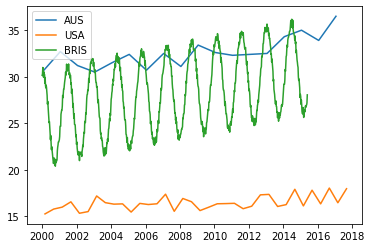

In [40]:
import matplotlib.pyplot as plt
plt.plot(df_aus.date, df_aus.temperature, label="AUS")
plt.plot(df_usa.date, df_usa.temperature, label="USA")
plt.plot(df_bris.date, df_bris.temperature, label="BRIS")
plt.legend();

### Ordered Merging with pd.merge_ordered()

In [44]:
'''
orders the result set by the merge column values
fill method fills in any missing values.  ffill uses
the previous value
'''

pd.merge_ordered(df_aus, df_usa, on="date", 
                 suffixes=("_aus", "_usa"),
                 fill_method="ffill")

,date,temperature_aus,temperature_usa
0,2000-01-20,30.6,NaN
1,2000-03-01,30.6,15.25
2,2000-09-01,30.6,15.77
3,2001-01-20,32.7,15.77
4,2001-03-01,32.7,15.98
5,2001-09-01,32.7,16.55
6,2002-01-20,31.2,16.55
7,2002-03-01,31.2,15.32
8,2002-09-01,31.2,15.50
9,2003-01-20,30.5,15.50


### As of Merging with pd.merge_asof

In [65]:
'''
Adding the Brisbane data will result in a ton of filled in
rows since the sample reate is so much higher
'''
df_both = pd.merge_ordered(df_aus, df_usa, on="date", 
                 suffixes=("_aus", "_usa"),
                 fill_method="ffill")

df_all =  pd.merge_ordered(df_both, df_bris, on="date", 
                 fill_method="ffill")
df_all.shape  #850 rows

(850, 4)

In [78]:
'''
use the merge_asof() function to sample a brisbane time
around the existing dates 

matches partial data

'''
df_all = pd.merge_asof(df_both, df_bris, on="date").rename(columns={"temperature": "temp_bris"})
df_all.shape #only 54 columns

(54, 4)

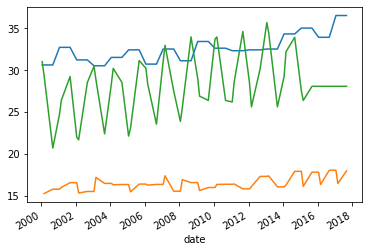

In [80]:
df_all.plot("date", ["temperature_aus", "temperature_usa", "temp_bris"],
           legend=False)

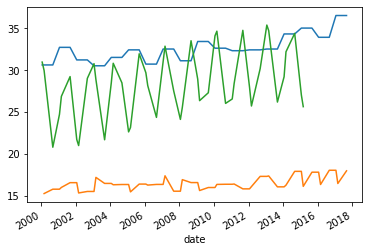

In [95]:
'''
Same thing only this now shows:

1. use of the tolerance parameter, only values within 15 days will be used
this prevents the flattening out of the brisbane data

2. Use of the direction parameter which tells pandas where to pull the 
asof value from (backward/forward/nearest)

3.Using slicing notation to define y series

'''

df_tmp = pd.merge_asof(df_both, df_bris, on="date", \
                       tolerance=pd.Timedelta('50000 days'),
                       direction="forward")

df_tmp.plot("date", df_tmp.columns[1:], legend=False)